In [3]:
from rdkit import Chem
from rdkit.Chem import AllChem
from rdkit.Chem import rdDistGeom
from typing import List, Tuple
import numpy as np
import rdkit
import pandas as pd


def get_3d_coords_from_smiles(smiles:str, add_hydrogen:bool=True, seed=0xf00d):

    m = Chem.MolFromSmiles(smiles)
    # necessary to add hydrogen for consistent conformer generation
    m = Chem.AddHs(m)

    ## 3D conformer generation
    ps = rdDistGeom.ETKDGv3()
    ps.randomSeed = seed
    #ps.coordMap = coordMap = {0:[0,0,0]}
    AllChem.EmbedMolecule(m,ps)


    conf = m.GetConformer()

    ## if we dont want hydrogen, we need to rebuild a molecule without explicit hydrogens
    if not(add_hydrogen):
        m = Chem.MolFromSmiles(smiles)
    
    sub = m.GetSubstructMatch(m)

    ## intiliazing properties dictionary with the 3d coordinates of each atom
    properties = {i:{"atom_name":m.GetAtoms()[s].GetSymbol(), "coordinates":np.array(conf.GetAtomPosition(s)), "bond_adjacency_list":[]} for i,s in enumerate(sub)}

    ## creating adjacency list for bonds 
    for bond in m.GetBonds():
        properties[bond.GetBeginAtomIdx()]["bond_adjacency_list"].append((bond.GetEndAtomIdx(), str(bond.GetBondType())))

    return properties


#
def translate_properties(properties):
    """Translate all 3d coordinates such that the first atom has coordinates (0,0,0)

    Args:
        properties (_type_): _description_

    Returns:
        _type_: _description_
    """
    from copy import deepcopy

    first_atom_coordinates = properties[0]["coordinates"]
    normalized_properties = deepcopy(properties)

    for k in properties:
        normalized_properties[k]["coordinates"] = normalized_properties[k]["coordinates"] - first_atom_coordinates

    return normalized_properties



def print_coordinates(properties):
    """Print 3D coordinates of each atom of a molecule
    """

    for k in properties:
        print(f"Name: {properties[k]['atom_name']}{k} Coords:{properties[k]['coordinates']}")


smiles = 'CC(C)C'

properties = get_3d_coords_from_smiles(smiles=smiles, seed=3, add_hydrogen=True)

print_coordinates(properties=properties)

normalized_properties = translate_properties(properties=properties)

print_coordinates(normalized_properties)


Name: C0 Coords:[ 1.42818766 -0.14813806  0.08477478]
Name: C1 Coords:[-0.03701396 -0.03146544  0.41758567]
Name: C2 Coords:[-0.78503034 -1.08658259 -0.35578434]
Name: C3 Coords:[-0.61566472  1.30330658  0.07065338]
Name: H4 Coords:[2.07037515 0.49551914 0.71512974]
Name: H5 Coords:[ 1.71660132 -1.20892847  0.29642142]
Name: H6 Coords:[ 1.6178553   0.02771058 -1.00275004]
Name: H7 Coords:[-0.12895147 -0.17315105  1.5196666 ]
Name: H8 Coords:[-1.27395018 -1.75945163  0.39039957]
Name: H9 Coords:[-1.57245633 -0.67905774 -1.0048914 ]
Name: H10 Coords:[-0.11544116 -1.70273711 -0.9906863 ]
Name: H11 Coords:[-1.41616048  1.60261002  0.79153569]
Name: H12 Coords:[-1.0294526   1.24483837 -0.96890214]
Name: H13 Coords:[0.14110181 2.11552741 0.03684737]
Name: C0 Coords:[0. 0. 0.]
Name: C1 Coords:[-1.46520162  0.11667262  0.33281089]
Name: C2 Coords:[-2.213218   -0.93844453 -0.44055912]
Name: C3 Coords:[-2.04385239  1.45144464 -0.0141214 ]
Name: H4 Coords:[0.64218748 0.6436572  0.63035495]
Name: 

In [24]:
N = 4

first_node_index = [i for i in range(N) for j in range(N)]

second_node_index = [j for i in range(N) for j in range(N)]


row, col, [(i,j) for i in range(N) for j in range(N)]


([0, 0, 0, 0, 1, 1, 1, 1, 2, 2, 2, 2, 3, 3, 3, 3],
 [0, 1, 2, 3, 0, 1, 2, 3, 0, 1, 2, 3, 0, 1, 2, 3],
 [(0, 0),
  (0, 1),
  (0, 2),
  (0, 3),
  (1, 0),
  (1, 1),
  (1, 2),
  (1, 3),
  (2, 0),
  (2, 1),
  (2, 2),
  (2, 3),
  (3, 0),
  (3, 1),
  (3, 2),
  (3, 3)])

In [19]:
from collections import defaultdict

m = Chem.MolFromSmiles(smiles)
# necessary to add hydrogen for consistent conformer generation
m = Chem.AddHs(m)
## 3D conformer generation
ps = rdDistGeom.ETKDGv3()
ps.randomSeed = 3
#ps.coordMap = coordMap = {0:[0,0,0]}
AllChem.EmbedMolecule(m,ps)

from rdkit.Chem.rdchem import BondType as BT


bonds = {BT.SINGLE: 1, BT.DOUBLE: 2, BT.TRIPLE: 3, BT.AROMATIC: 4}

    


for i in range(len(m.GetAtoms())):
    for j in range(len(m.GetAtoms())):
        print(i,j, bonds_dict[(i,j)])

0 0 0
0 1 1
0 2 0
0 3 0
0 4 1
0 5 1
0 6 1
0 7 0
0 8 0
0 9 0
0 10 0
0 11 0
0 12 0
0 13 0
1 0 0
1 1 0
1 2 1
1 3 1
1 4 0
1 5 0
1 6 0
1 7 1
1 8 0
1 9 0
1 10 0
1 11 0
1 12 0
1 13 0
2 0 0
2 1 0
2 2 0
2 3 0
2 4 0
2 5 0
2 6 0
2 7 0
2 8 1
2 9 1
2 10 1
2 11 0
2 12 0
2 13 0
3 0 0
3 1 0
3 2 0
3 3 0
3 4 0
3 5 0
3 6 0
3 7 0
3 8 0
3 9 0
3 10 0
3 11 1
3 12 1
3 13 1
4 0 0
4 1 0
4 2 0
4 3 0
4 4 0
4 5 0
4 6 0
4 7 0
4 8 0
4 9 0
4 10 0
4 11 0
4 12 0
4 13 0
5 0 0
5 1 0
5 2 0
5 3 0
5 4 0
5 5 0
5 6 0
5 7 0
5 8 0
5 9 0
5 10 0
5 11 0
5 12 0
5 13 0
6 0 0
6 1 0
6 2 0
6 3 0
6 4 0
6 5 0
6 6 0
6 7 0
6 8 0
6 9 0
6 10 0
6 11 0
6 12 0
6 13 0
7 0 0
7 1 0
7 2 0
7 3 0
7 4 0
7 5 0
7 6 0
7 7 0
7 8 0
7 9 0
7 10 0
7 11 0
7 12 0
7 13 0
8 0 0
8 1 0
8 2 0
8 3 0
8 4 0
8 5 0
8 6 0
8 7 0
8 8 0
8 9 0
8 10 0
8 11 0
8 12 0
8 13 0
9 0 0
9 1 0
9 2 0
9 3 0
9 4 0
9 5 0
9 6 0
9 7 0
9 8 0
9 9 0
9 10 0
9 11 0
9 12 0
9 13 0
10 0 0
10 1 0
10 2 0
10 3 0
10 4 0
10 5 0
10 6 0
10 7 0
10 8 0
10 9 0
10 10 0
10 11 0
10 12 0
10 13 0
11 0 0
11 1 0
11 2

{(0, 1): 1,
 (1, 2): 1,
 (1, 3): 1,
 (0, 4): 1,
 (0, 5): 1,
 (0, 6): 1,
 (1, 7): 1,
 (2, 8): 1,
 (2, 9): 1,
 (2, 10): 1,
 (3, 11): 1,
 (3, 12): 1,
 (3, 13): 1}


     RDKit          3D

 14 13  0  0  0  0  0  0  0  0999 V2000
    1.4282   -0.1481    0.0848 C   0  0  0  0  0  0  0  0  0  0  0  0
   -0.0370   -0.0315    0.4176 C   0  0  0  0  0  0  0  0  0  0  0  0
   -0.7850   -1.0866   -0.3558 C   0  0  0  0  0  0  0  0  0  0  0  0
   -0.6157    1.3033    0.0707 C   0  0  0  0  0  0  0  0  0  0  0  0
    2.0704    0.4955    0.7151 H   0  0  0  0  0  0  0  0  0  0  0  0
    1.7166   -1.2089    0.2964 H   0  0  0  0  0  0  0  0  0  0  0  0
    1.6179    0.0277   -1.0028 H   0  0  0  0  0  0  0  0  0  0  0  0
   -0.1290   -0.1732    1.5197 H   0  0  0  0  0  0  0  0  0  0  0  0
   -1.2740   -1.7595    0.3904 H   0  0  0  0  0  0  0  0  0  0  0  0
   -1.5725   -0.6791   -1.0049 H   0  0  0  0  0  0  0  0  0  0  0  0
   -0.1154   -1.7027   -0.9907 H   0  0  0  0  0  0  0  0  0  0  0  0
   -1.4162    1.6026    0.7915 H   0  0  0  0  0  0  0  0  0  0  0  0
   -1.0295    1.2448   -0.9689 H   0  0  0  0  0  0  0  0  0  0  0  0
    0.1411    2.1155    0

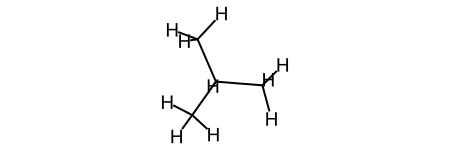

In [62]:
smiles = 'CC(C)C'

m = Chem.MolFromSmiles(smiles)
# necessary to add hydrogen for consistent conformer generation
m = Chem.AddHs(m)
## 3D conformer generation
ps = rdDistGeom.ETKDGv3()
ps.randomSeed = 3
#ps.coordMap = coordMap = {0:[0,0,0]}
AllChem.EmbedMolecule(m,ps)

print(Chem.MolToMolBlock(m))
m
